# WeatherPy
----

### SHartje - Analysis Comments
* The weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude) where you can see a defined peak in the data.  The Southern hemisphere (positive Latitude values) has a greater variance in temperature than the Northern Hemispshere and it overall appears cooler.  This makes sense considering the tilt of the earth and the fact that the Northern Hemisphere is approaching summer.
* There is no strong relationship between latitude and humidity.  However, it is interesting that the vast majority of observations have a humidity of over 50%.
* There doesn't appear to be a strong relationship between latitude and wind speed but there is a slight upward trend as we move further South.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save base url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #farenheit and MPH

#Empty list to save the responses and counter variable
weather_json = []
x = 1

#Print initial header for print log
print(f"Beginning Data Retrieval\n---------------------------------")

# Make a request for each of the cities
for city in cities:
    
    try:    
        # Build query URL
        query_url = f"{url}appid={api_key}&q={city}&units={units}"

        # Get one of the posts
        post_response = requests.get(query_url)

        # Save post's JSON
        weather_json.append(post_response.json())

        # Create print log
        print(f"Processing Record {x} | {city}")
        x = x+1

    except:
        print("Missing field/result... skipping.")


Beginning Data Retrieval
---------------------------------
Processing Record 1 | zharkent
Processing Record 2 | hamilton
Processing Record 3 | minas de barroteran
Processing Record 4 | thompson
Processing Record 5 | hearst
Processing Record 6 | maloy
Processing Record 7 | ahuimanu
Processing Record 8 | ushuaia
Processing Record 9 | yellowknife
Processing Record 10 | nemetker
Processing Record 11 | ancud
Processing Record 12 | punta arenas
Processing Record 13 | vaini
Processing Record 14 | albany
Processing Record 15 | nacala
Processing Record 16 | lebu
Processing Record 17 | rikitea
Processing Record 18 | hithadhoo
Processing Record 19 | busselton
Processing Record 20 | harper
Processing Record 21 | pisco
Processing Record 22 | khatanga
Processing Record 23 | jamestown
Processing Record 24 | graaff-reinet
Processing Record 25 | husavik
Processing Record 26 | butaritari
Processing Record 27 | kodiak
Processing Record 28 | port hardy
Processing Record 29 | salalah
Processing Record 30 |

Processing Record 248 | lavrentiya
Processing Record 249 | saint-francois
Processing Record 250 | severo-kurilsk
Processing Record 251 | taltal
Processing Record 252 | grindavik
Processing Record 253 | kelo
Processing Record 254 | batemans bay
Processing Record 255 | fort nelson
Processing Record 256 | san luis
Processing Record 257 | kondinskoye
Processing Record 258 | verkhnevilyuysk
Processing Record 259 | cidreira
Processing Record 260 | anyksciai
Processing Record 261 | tomatlan
Processing Record 262 | salinas
Processing Record 263 | ust-ilimsk
Processing Record 264 | hue
Processing Record 265 | jardim
Processing Record 266 | tecpan
Processing Record 267 | lorengau
Processing Record 268 | ladozhskaya
Processing Record 269 | dzhebariki-khaya
Processing Record 270 | kushiro
Processing Record 271 | belushya guba
Processing Record 272 | talaya
Processing Record 273 | maragogi
Processing Record 274 | whittlesea
Processing Record 275 | mananjary
Processing Record 276 | san cristobal
Pro

Processing Record 496 | susanville
Processing Record 497 | asyut
Processing Record 498 | sao gabriel da cachoeira
Processing Record 499 | flin flon
Processing Record 500 | nikolsk
Processing Record 501 | bronnoysund
Processing Record 502 | sao filipe
Processing Record 503 | hambantota
Processing Record 504 | oussouye
Processing Record 505 | tullahoma
Processing Record 506 | waddan
Processing Record 507 | bolsheustikinskoye
Processing Record 508 | zyryanka
Processing Record 509 | santiago del estero
Processing Record 510 | turukhansk
Processing Record 511 | goure
Processing Record 512 | galiwinku
Processing Record 513 | dhidhdhoo
Processing Record 514 | yulara
Processing Record 515 | pochutla
Processing Record 516 | ellensburg
Processing Record 517 | kang
Processing Record 518 | broome
Processing Record 519 | mackay
Processing Record 520 | asfi
Processing Record 521 | lagos
Processing Record 522 | brigantine
Processing Record 523 | celestun
Processing Record 524 | mazyr
Processing Recor

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Show weather_json to understand how to pull out data
weather_json

[{'coord': {'lon': 80, 'lat': 44.17},
  'weather': [{'id': 801,
    'main': 'Clouds',
    'description': 'few clouds',
    'icon': '02n'}],
  'base': 'stations',
  'main': {'temp': 29.12,
   'pressure': 1023.54,
   'humidity': 68,
   'temp_min': 29.12,
   'temp_max': 29.12,
   'sea_level': 1023.54,
   'grnd_level': 827.66},
  'wind': {'speed': 1.03, 'deg': 335.504},
  'clouds': {'all': 20},
  'dt': 1554569701,
  'sys': {'message': 0.0034,
   'country': 'KZ',
   'sunrise': 1554509593,
   'sunset': 1554556293},
  'id': 1520253,
  'name': 'Zharkent',
  'cod': 200},
 {'coord': {'lon': -64.78, 'lat': 32.3},
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04d'}],
  'base': 'stations',
  'main': {'temp': 68.88,
   'pressure': 1024,
   'humidity': 77,
   'temp_min': 68,
   'temp_max': 69.8},
  'visibility': 10000,
  'wind': {'speed': 19.46, 'deg': 90},
  'clouds': {'all': 75},
  'dt': 1554568325,
  'sys': {'type': 1,
   'id': 8816,
   'message':

In [5]:
# placeholder dataframe
weather_dict = {"City":cities}
weather_data = pd.DataFrame(weather_dict)

weather_data["Cloudiness"] = ""
weather_data["Country"] = ""
weather_data["Date"] = ""
weather_data["Humidity"] = ""
weather_data["Lat"] = ""
weather_data["Lng"] = ""
weather_data["Max Temp"] = ""
weather_data["Wind Speed"] = ""

weather_data.head()

City Cloudiness Country Date Humidity Lat Lng Max Temp  \
0             zharkent                                                     
1             hamilton                                                     
2  minas de barroteran                                                     
3             thompson                                                     
4               hearst                                                     

  Wind Speed  
0             
1             
2             
3             
4

In [6]:
# Loop through the list of cities and add data to the dataframe from the json
for index, row in weather_data.iterrows():
    
        #define city in the context of the dataframe
        city = row["City"]
        
        # Build query URL
        query_url = f"{url}appid={api_key}&q={city}&units={units}"

        # Get one of the responses
        post_response = requests.get(query_url)

        # Save response's as JSON
        weather_json = post_response.json()
    
        #Add to dataframe
        try:
            weather_data.loc[index, "Cloudiness"] = weather_json["clouds"]["all"]
            weather_data.loc[index, "Country"] = weather_json["sys"]["country"]
            weather_data.loc[index, "Date"] = weather_json["dt"]
            weather_data.loc[index, "Humidity"] = weather_json["main"]["humidity"]
            weather_data.loc[index, "Lat"] = weather_json["coord"]["lat"]
            weather_data.loc[index, "Lng"] = weather_json["coord"]["lon"]
            weather_data.loc[index, "Max Temp"] = weather_json["main"]["temp_max"]
            weather_data.loc[index, "Wind Speed"] = weather_json["wind"]["speed"]
        except(KeyError, IndexError):
            print("Missing field/result... skipping.")

Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/result... skipping.
Missing field/

In [8]:
weather_data

City Cloudiness Country        Date Humidity    Lat     Lng  \
0          kokorevka          0      RU  1554160460       61  52.59   34.27   
1            mataura         92      NZ  1554160205       77 -46.19  168.86   
2           saleaula                                                          
3          bathsheba         20      BB  1554156000       69  13.22  -59.52   
4            kushima         20      JP  1554160345       61   31.5  131.29   
5           souillac         76      FR  1554160247       87   45.6    -0.6   
6       punta arenas         90      CL  1554160346       93 -53.16  -70.91   
7         toora-khem         44      RU  1554160461       77  52.47   96.11   
8              kapaa         20      US  1554160408       65  22.08 -159.32   
9          jamestown          0      AU  1554160462       69 -33.21   138.6   
10   bambous virieux         40      MU  1554160441       88 -20.34   57.76   
11            beloha          0      MG  1554160462       89 -25.17   45.06   
12      puerto ayora         20      EC  1554159608       70  -0.74  -90.35   
13    saint-augustin          0      FR  1554160158       76  44.83   -0.61   
14             pevek          0      RU  1554160462       81   69.7  170.27   
15       barentsburg                                                          
16           rikitea          0      PF  1554160463      100 -23.12 -134.97   
17          buraydah         40      SA  1554156000       36  26.33   43.97   
18     mar del plata          0      AR  1554160463       57 -46.43  -67.52   
19             bluff          0      AU  1554160463       53 -23.58  149.07   
20            albany          1      US  1554160322       32  42.65  -73.75   
21            castro         90      CL  1554156000      100 -42.48  -73.76   
22          goderich         68      CA  1554160306       72  43.74  -81.71   
23      batemans bay          0      AU  1554160002       74 -35.71  150.18   
24             sitka          0      US  1554156968       38  37.17  -99.65   
25      bogorodskoye         56      RU  1554160465       70  52.37  140.44   
26            yulara          0      AU  1554156000       35 -25.24  130.99   
27          bulawayo          0      ZW  1554160465       63 -20.16   28.59   
28         cape town          0      ZA  1554160391       54 -33.93   18.42   
29            shingu         20      JP  1554158400      100  33.72  135.99   
..               ...        ...     ...         ...      ...    ...     ...   
598          maturin          0      VE  1554160572       50   9.75  -63.18   
599         kirakira         76      SB  1554160572      100 -10.46  161.92   
600         olafsvik                                                          
601          samarai         92      PG  1554160573      100 -10.62  150.67   
602          husavik         32      CA  1554160525       55  50.56  -96.99   
603        mananjary          8      MG  1554160573       92 -19.16    46.8   
604            kohlu          8      PK  1554160573       48   29.9   69.25   
605             juba          0      EE  1554160269       74  57.82   26.93   
606        dalbandin         12      PK  1554160574       45   28.9   64.41   
607         tsihombe                                                          
608              bud         44      NO  1554160562       59  62.91    6.91   
609         camacupa          0      AO  1554160574       70 -12.02   17.48   
610       turukhansk         68      RU  1554160574       94   65.8   87.96   
611           hihifo                                                          
612           chagda                                                          
613          gravdal         24      NO  1554160542       69  59.79    5.78   
614        iskateley         88      RU  1554160575       88  67.68   53.15   
615          kurchum          0      KZ  1554160575       80  48.57   83.65   
616        kastamonu         92      TR  1554160318       92  41.3

In [7]:
   #Spot check results
    # Build query URL
    city = "kokorevka"  #Picked a random city from results above
        
    query_url = f"{url}appid={api_key}&q={city}&units={units}"

    # Get one of the posts
    post_response = requests.get(query_url)

    # Save post's JSON
    weather_json = post_response.json()
    weather_json

{'coord': {'lon': 34.27, 'lat': 52.59},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 41.09,
  'pressure': 1022.1,
  'humidity': 57,
  'temp_min': 41.09,
  'temp_max': 41.09,
  'sea_level': 1022.1,
  'grnd_level': 1000.3},
 'wind': {'speed': 8.41, 'deg': 82.504},
 'clouds': {'all': 44},
 'dt': 1554570488,
 'sys': {'message': 0.0041,
  'country': 'RU',
  'sunrise': 1554519987,
  'sunset': 1554567845},
 'id': 546633,
 'name': 'Kokorevka',
 'cod': 200}

In [8]:
#Drop rows that have no data
weather_data["Cloudiness"].replace('', np.nan, inplace=True)
weather_data["Country"].replace('', np.nan, inplace=True)
weather_data["Date"].replace('', np.nan, inplace=True)
weather_data["Humidity"].replace('', np.nan, inplace=True)
weather_data["Lat"].replace('', np.nan, inplace=True)
weather_data["Lng"].replace('', np.nan, inplace=True)
weather_data["Max Temp"].replace('', np.nan, inplace=True)
weather_data["Wind Speed"].replace('', np.nan, inplace=True)
weather_data.dropna(subset=["Cloudiness"], inplace=True)
weather_data


City  Cloudiness Country          Date  Humidity    Lat  \
0               zharkent        20.0      KZ  1.554570e+09      68.0  44.17   
1               hamilton        75.0      BM  1.554569e+09      77.0  32.30   
2    minas de barroteran         0.0      MX  1.554569e+09      38.0  27.63   
3               thompson        20.0      CA  1.554566e+09      31.0  55.74   
4                 hearst         0.0      CA  1.554569e+09      58.0  49.69   
5                  maloy        12.0      ID  1.554570e+09      89.0   1.00   
6               ahuimanu        75.0      US  1.554570e+09      82.0  21.44   
7                ushuaia        90.0      AR  1.554566e+09      69.0 -54.81   
8            yellowknife        75.0      CA  1.554569e+09      60.0  62.45   
9               nemetker         0.0      HU  1.554570e+09      69.0  46.72   
10                 ancud        90.0      CL  1.554566e+09      93.0 -41.87   
11          punta arenas        40.0      CL  1.554569e+09      89.0 -53.16   
12                 vaini         0.0      IN  1.554570e+09      76.0  15.34   
13                albany        90.0      US  1.554569e+09      66.0  42.65   
14                nacala        44.0      MZ  1.554570e+09      92.0 -14.56   
15                  lebu         0.0      ET  1.554570e+09      59.0   8.96   
16               rikitea        76.0      PF  1.554570e+09     100.0 -23.12   
17             hithadhoo        44.0      MV  1.554570e+09     100.0  -0.60   
18             busselton        76.0      AU  1.554570e+09      53.0 -33.64   
19                harper        90.0      US  1.554570e+09      83.0  30.30   
20                 pisco        75.0      PE  1.554566e+09      30.0 -13.71   
21              khatanga        48.0      RU  1.554570e+09      84.0  71.98   
22             jamestown         0.0      AU  1.554570e+09      82.0 -33.21   
23         graaff-reinet         0.0      ZA  1.554569e+09      60.0 -32.25   
24               husavik        64.0      CA  1.554570e+09      77.0  50.56   
25            butaritari        92.0      KI  1.554570e+09     100.0   3.07   
26                kodiak         1.0      US  1.554570e+09      39.0  39.95   
27            port hardy        75.0      CA  1.554566e+09      81.0  50.70   
28               salalah        20.0      OM  1.554566e+09      74.0  17.01   
30               melenci         0.0      RS  1.554569e+09      44.0  45.52   
..                   ...         ...     ...           ...       ...    ...   
581                 poum        40.0      MK  1.554568e+09      62.0  41.28   
582      haines junction        32.0      CA  1.554570e+09      83.0  60.75   
583                tyrma        56.0      RU  1.554570e+09      80.0  50.04   
584                 lima        90.0      PE  1.554566e+09      69.0 -12.06   
585                bilma         0.0      NE  1.554570e+09      12.0  18.69   
586              aklavik         5.0      CA  1.554566e+09      77.0  68.22   
587            suhbaatar         0.0      MN  1.554570e+09      51.0  50.23   
588             nichinan        88.0      JP  1.554570e+09     100.0  31.65   
589   conceicao da barra         0.0      BR  1.554570e+09      82.0 -18.59   
590              waipawa        88.0      NZ  1.554567e+09      93.0 -39.94   
591            pringsewu        12.0      ID  1.554570e+09      85.0  -5.36   
593                 nuuk        75.0      GL  1.554569e+09      44.0  64.17   
594            arbuzynka         0.0      UA  1.554570e+09      55.0  47.91   
595           townsville        90.0      AU  1.554569e+09      94.0 -19.26   
596              pangody        92.0      RU  1.554570e+09      93.0  65.85   
597                nzega        44.0      TZ  1.554570e+09      74.0  -4.22   
598          honningsvag        80.0      NO  1.554570e+09      98.0  70.98   
599            sotouboua        36.0      TG  1.554570e+09      63.0   8.56   
600          ikalamavony        36.0      MG  1.554570e+09      80.0 -

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

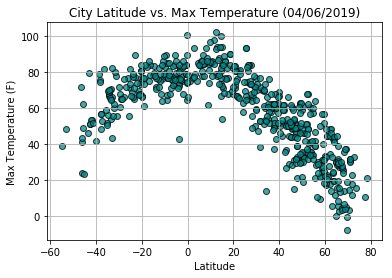

In [9]:
#assign variables for data
lat = weather_data["Lat"]
maxtemp = weather_data["Max Temp"]

#build the scatter plot
latvtemp = plt.scatter(lat, maxtemp, marker="o", facecolors="darkcyan", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
date = pd.Timestamp("today").strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#### Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

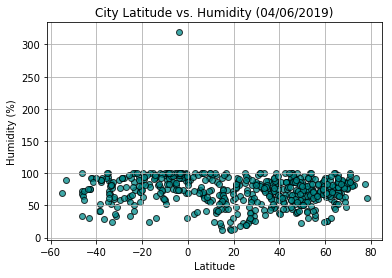

In [11]:
#assign variables for data
lat = weather_data["Lat"]
humidity = weather_data["Humidity"]

#build the scatter plot
latvhumid = plt.scatter(lat, humidity, marker="o", facecolors="darkcyan", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
date = pd.Timestamp("today").strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

In [12]:
#Find the outliers with ridiculous humidity in case its junk data (and in case it's the lost city of Atlantis)
weather_data.loc[weather_data["Humidity"]>200]

City  Cloudiness Country          Date  Humidity   Lat    Lng  \
325  iquitos        20.0      PE  1.554566e+09     319.0 -3.75 -73.25   

     Max Temp  Wind Speed  
325      42.8        8.05

#### Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

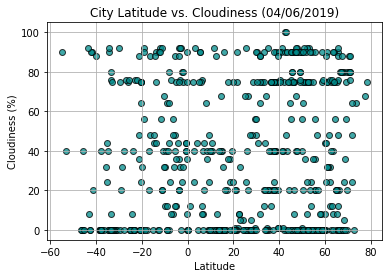

In [13]:
#assign variables for data
lat = weather_data["Lat"]
cloudiness = weather_data["Cloudiness"]

#build the scatter plot
latvcloud = plt.scatter(lat, cloudiness, marker="o", facecolors="darkcyan", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
date = pd.Timestamp("today").strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#### Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

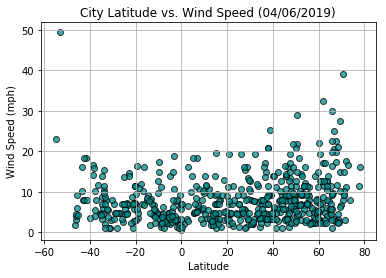

In [15]:
#assign variables for data
lat = weather_data["Lat"]
wind = weather_data["Wind Speed"]

#build the scatter plot
latvwind = plt.scatter(lat, wind, marker="o", facecolors="darkcyan", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.grid()
date = pd.Timestamp("today").strftime("%m/%d/%Y")
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")